In [1]:
import json
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tqdm.notebook import tqdm

import scrape
import yelp
import constants

sys.path.append("../helpers/")
import helpers

%load_ext autoreload
%autoreload 2

In [2]:
import nord_vpn

from sys import platform

if platform != "darwin":
    pass
    vpn = nord_vpn.NordVPN()
    vpn.connect()
    vpn.disconnect()
    vpn.check_status()

In [3]:
url = scrape.get_michelin_guide_url("new york", "new york", stars="1")
print(url)

https://guide.michelin.com/us/en/new-york-state/new-york/restaurants/1-star-michelin


In [4]:
restaurant_html_list = scrape.get_michelin_guide_restaurant_html_list("new york", "new york", stars="3")
restaurant_html = restaurant_html_list[0]

In [5]:
scrape.MichelinRestaurant(restaurant_html_list[1])

['355', 'USD', '•', 'Contemporary', 'French']


Per Se | 3 Stars | None Stars (Google Reviews)| 355

In [6]:
# restaurant_html_list = scrape.get_michelin_guide_restaurant_html_list("new york", "new york", stars="1+")
# restaurant_list = scrape.get_convert_restaurant_html_list_to_restaurants(restaurant_html_list)
# restaurant_list = sorted(restaurant_list)

# Michelin Star Restaurants

In [7]:
# restaurant_data = pd.DataFrame([(restaurant.name, restaurant.cost, restaurant.distinction,
#                                  restaurant.google_rating, restaurant) for restaurant in restaurant_list],
#                                columns=["name", "cost", "michelin_stars", "google_rating", "restaurant"])

In [8]:
# restaurant_data = restaurant_data.sort_values(by=["cost", "google_rating"], ascending=[True, False]).reset_index()
# restaurant_data.head(50)

# Bib Gourmand

In [9]:
# bib_gourmand_restaurant_html_list = scrape.get_michelin_guide_restaurant_html_list("new york", "new york", stars="0")
# bib_gourmand_restaurant_list = scrape.get_convert_restaurant_html_list_to_restaurants(bib_gourmand_restaurant_html_list)
# bib_gourmand_restaurant_list = sorted(bib_gourmand_restaurant_list)

In [10]:
# bib_gourmand_restaurant_data = pd.DataFrame([(restaurant.name, restaurant.cost, restaurant.distinction,
#                                  restaurant.google_rating, restaurant) for restaurant in bib_gourmand_restaurant_list],
#                                columns=["name", "cost", "michelin_stars", "google_rating", "restaurant"])

# bib_gourmand_restaurant_data = bib_gourmand_restaura`nt_data.sort_values(by=["cost", "google_rating"],
#                                                                         ascending=[True, False]).reset_index()
# bib_gourmand_restaurant_data.query("google_rating == 4.3").head(50)

# Yelp Data Pulling

In [11]:
overwrite = False

In [190]:
data = helpers.cached_function(f"data/yelp_data.pkl", yelp.get_all_restaurants,
                               "restaurant", price="1,2,3,4", sort_by="rating", location="NYC", top=1000,
                               per_price=True, overwrite=False)

In [199]:
restaurant_data = yelp.yelp_data_to_restaurant_df(data)
restaurant_data = restaurant_data.query("rating > 3.5 and review_count > 40")
restaurant_data.sort_values(["rating", "review_count"], ascending=False, inplace=True)
restaurant_data.reset_index(inplace=True)

In [200]:
restaurant_data.head()

,index,name,review_count,rating,id,alias,price,categories,address,city
0,1900,Haidilao Hot Pot Flushing,1784,5.0,jWuUibgnTGsJibOrr6UUSw,haidilao-hot-pot-flushing-flushing,$$$,"Hot Pot, Chinese","138-23 39th Ave, Flushing, NY 11354",Flushing
1,956,The Alcove,1027,5.0,MNNpsRXe7Wt5m3Jla9Wk0w,the-alcove-sunnyside,$$,"Gastropubs, Tapas Bars, Breakfast & Brunch","41-11 49th St, Sunnyside, NY 11104",Sunnyside
2,1901,Otis,446,5.0,RfxOtJ4SQmEeVX_XjFLWUQ,otis-brooklyn-2,$$$,"American (New), Cocktail Bars","18 Harrison Pl, Brooklyn, NY 11206",Brooklyn
3,958,Scott's Pizza Tours,355,5.0,VP3-iMnKK_TaHDuy6mxTzA,scotts-pizza-tours-new-york,$$,"Pizza, Food Tours, Walking Tours","New York, NY 10001",New York
4,14,Joey Bats Café,349,5.0,uYMimeHJ5XBGkyTrg8GXhw,joey-bats-café-new-york,$,"Desserts, Portuguese, Cafes","129 Allen St, New York, NY 10002",New York


In [ ]:
restaurant_data = helpers.cached_function("data/yelp_data_with_google_reviews.pkl",
                                          yelp.add_google_place_info, restaurant_data, overwrite=False)

Fetching Google info:  30%|███████████████████████████████████████▍                                                                                            | 789/2644 [10:01<19:38,  1.57 request/s]

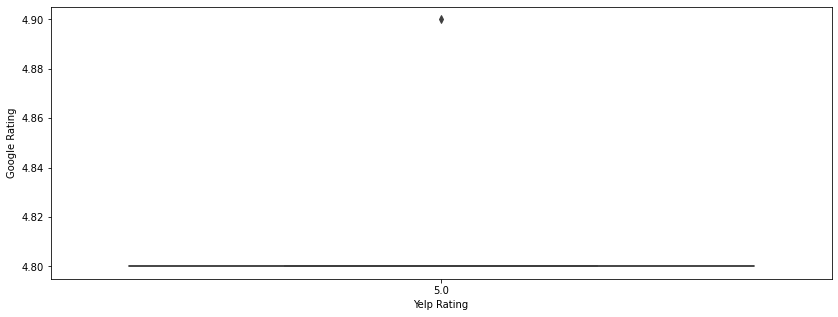

In [195]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.boxplot(data=restaurant_data, x="rating", y="google_rating", ax=ax)
helpers.add_plt_labels(ax, x="Yelp Rating", y="Google Rating")

In [ ]:
t = YelpRestaurant(data["businesses"][0])
vars(t)

In [ ]:
class YelpRestaurant:
    def __init__(self, yelp_data: dict):
        for key, value in yelp_data.items():
            self.__dict__[key] = value
        
        self.google_rating = get_google_rating(f"{self.alias}")

In [ ]:
data["businesses"][3]